<a href="https://colab.research.google.com/github/fowardelcac/Keras-FreeCodeCamp/blob/main/a_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation and Proccesing

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

train_labels = [] # 1->Side efects
train_samples = []

In [2]:
for i in range(50):
  # The ~5 of younger pacients who did exp side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  # The ~5% of older individuals who did not exper side
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  # The ~95% of younger pacients who did not exper side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # The ~95% of older individuals who did  exper side
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [4]:
len(test_samples)

2100

In [5]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
# Shuffle is used to get rid of dataset order
test_labels, test_samples = shuffle(test_labels, test_samples)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
# scaler does not accept 1D Data, so we transform our data to shape(-1, 1)
# train_samples: shape(2100,)
scaled_train_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [10]:
# New shape(2100, 1) matriz de 2 dimensiones con una sola columna
scaled_train_samples[:5], scaled_train_samples.shape

(array([[0.05747126],
        [0.6091954 ],
        [0.13793103],
        [0.74712644],
        [0.59770115]]),
 (2100, 1))

# Buil NN

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [15]:
model = Sequential([
    Input(shape=(1,)),
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'), #
    # Ouput Layer, just 2 units(0 or 1)
    # Softmax returns an output probability
    Dense(units=2, activation='softmax')
])


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [18]:
model.fit(
    x=scaled_train_samples,
    y=test_labels,
    batch_size = 10,
    epochs = 30,
    shuffle=True,
    verbose=2
    )

Epoch 1/30
210/210 - 2s - 8ms/step - accuracy: 0.5010 - loss: 0.6869
Epoch 2/30
210/210 - 1s - 3ms/step - accuracy: 0.5957 - loss: 0.6560
Epoch 3/30
210/210 - 1s - 3ms/step - accuracy: 0.6614 - loss: 0.6260
Epoch 4/30
210/210 - 1s - 3ms/step - accuracy: 0.7338 - loss: 0.5917
Epoch 5/30
210/210 - 1s - 3ms/step - accuracy: 0.7919 - loss: 0.5520
Epoch 6/30
210/210 - 0s - 2ms/step - accuracy: 0.8386 - loss: 0.5115
Epoch 7/30
210/210 - 1s - 3ms/step - accuracy: 0.8576 - loss: 0.4748
Epoch 8/30
210/210 - 1s - 3ms/step - accuracy: 0.8814 - loss: 0.4408
Epoch 9/30
210/210 - 0s - 2ms/step - accuracy: 0.8890 - loss: 0.4103
Epoch 10/30
210/210 - 0s - 2ms/step - accuracy: 0.9014 - loss: 0.3837
Epoch 11/30
210/210 - 0s - 2ms/step - accuracy: 0.9129 - loss: 0.3612
Epoch 12/30
210/210 - 0s - 2ms/step - accuracy: 0.9171 - loss: 0.3423
Epoch 13/30
210/210 - 0s - 2ms/step - accuracy: 0.9219 - loss: 0.3268
Epoch 14/30
210/210 - 1s - 3ms/step - accuracy: 0.9300 - loss: 0.3145
Epoch 15/30
210/210 - 1s - 3m

# Validation Set

In [20]:
model.fit(
    x=scaled_train_samples,
    y=test_labels,
    validation_split=0.1, #10%
    batch_size = 10,
    epochs = 30,
    # Shuffles the 90% of the dataset(training set), cause it fist takes out the validattion
    # set and then shuffles it
    shuffle=True,
    verbose=2
    )

Epoch 1/30
189/189 - 0s - 2ms/step - accuracy: 0.9423 - loss: 0.2378 - val_accuracy: 0.9381 - val_loss: 0.2474
Epoch 2/30
189/189 - 1s - 3ms/step - accuracy: 0.9418 - loss: 0.2373 - val_accuracy: 0.9381 - val_loss: 0.2474
Epoch 3/30
189/189 - 0s - 2ms/step - accuracy: 0.9418 - loss: 0.2372 - val_accuracy: 0.9381 - val_loss: 0.2477
Epoch 4/30
189/189 - 1s - 3ms/step - accuracy: 0.9429 - loss: 0.2369 - val_accuracy: 0.9381 - val_loss: 0.2478
Epoch 5/30
189/189 - 1s - 3ms/step - accuracy: 0.9418 - loss: 0.2365 - val_accuracy: 0.9381 - val_loss: 0.2480
Epoch 6/30
189/189 - 1s - 3ms/step - accuracy: 0.9418 - loss: 0.2364 - val_accuracy: 0.9381 - val_loss: 0.2474
Epoch 7/30
189/189 - 0s - 2ms/step - accuracy: 0.9481 - loss: 0.2361 - val_accuracy: 0.9381 - val_loss: 0.2483
Epoch 8/30
189/189 - 1s - 5ms/step - accuracy: 0.9444 - loss: 0.2359 - val_accuracy: 0.9381 - val_loss: 0.2481
Epoch 9/30
189/189 - 1s - 7ms/step - accuracy: 0.9418 - loss: 0.2357 - val_accuracy: 0.9381 - val_loss: 0.2477
E

# Test Model

In [22]:
test_samples = []
test_labels = []
for i in range(10):
  # The ~5 of younger pacients who did exp side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  # The ~5% of older individuals who did not exper side
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  # The ~95% of younger pacients who did not exper side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # The ~95% of older individuals who did  exper side
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

# Predict

In [25]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
for i in predictions:
  print(f"Raw prediction: {i}, Predictions(result): {np.argmax(i, axis = -1)}")

Raw prediction: [0.86883384 0.1311661 ], Predictions(result): 0
Raw prediction: [0.06398959 0.93601036], Predictions(result): 1
Raw prediction: [0.02854398 0.9714559 ], Predictions(result): 1
Raw prediction: [0.95747995 0.04252007], Predictions(result): 0
Raw prediction: [0.00821116 0.9917887 ], Predictions(result): 1
Raw prediction: [0.96121377 0.03878615], Predictions(result): 0
Raw prediction: [0.16419353 0.83580655], Predictions(result): 1
Raw prediction: [0.04289623 0.9571038 ], Predictions(result): 1
Raw prediction: [0.01384024 0.98615974], Predictions(result): 1
Raw prediction: [0.96826607 0.03173398], Predictions(result): 0
Raw prediction: [0.01012166 0.98987824], Predictions(result): 1
Raw prediction: [0.16419353 0.83580655], Predictions(result): 1
Raw prediction: [0.02854398 0.9714559 ], Predictions(result): 1
Raw prediction: [0.15021612 0.8497839 ], Predictions(result): 1
Raw prediction: [0.10385292 0.89614713], Predictions(result): 1
Raw prediction: [0.29338685 0.70661324],

# Confusion Matrix

In [26]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [28]:
cm = confusion_matrix(y_true=test_labels, y_pred=np.argmax(predictions, axis = -1))

In [29]:
cm

array([[198,  12],
       [ 10, 200]])

Fuck yea
[[198  12]
 [ 10 200]]


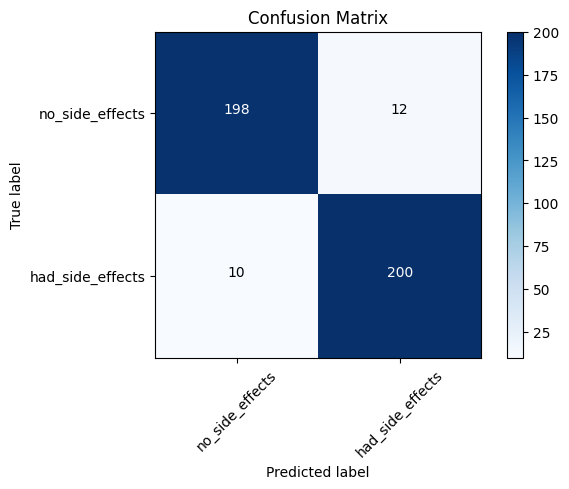

In [32]:
from ast import iter_child_nodes
def plot_confusion_matrix(
    cm,
    classes,
    normalize=False,
    title="Confusion Matrix",
    cmap=plt.cm.Blues
    ):
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Fuck yea")
  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

cm_plot_labels = ["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")


In [34]:
!git clone https://github.com/fowardelcac/Keras-FreeCodeCamp.git

Cloning into 'Keras-FreeCodeCamp'...
fatal: could not read Username for 'https://github.com': No such device or address
